In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
print(tf.__version__)
df = pd.read_json('../data/test.json').replace(np.nan, 0)
df

2.17.0


,contestId,index,name,rating,timeLimit,memoryLimit,statement,tags.constructive algorithms,tags.data structures,tags.greedy,...,tags.two pointers,tags.dfs and similar,tags.dsu,tags.graphs,tags.graph matchings,tags.hashing,tags.matrices,tags.flows,tags.2-sat,tags.probabilities
0,1506,D,Epic Transformation,1400.0,2,256,You are given an array a of length n consistin...,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1211,H,Road Repair in Treeland,3100.0,3,256,There are n cities and n1 twoway roads in Tree...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,760,A,Petr and a calendar,800.0,2,256,Petr wants to make a calendar for current mont...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1467,A,Wizard of Orz,900.0,1,256,There are n digital panels placed in a straigh...,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,424,C,Magic Formulas,1600.0,2,256,People in the Tomskaya region like magic formu...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,704,C,Black Widow,2900.0,2,256,Natalia Romanova is trying to test something o...,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
96,1893,C,Freedom of Choice,2000.0,3,512,Lets define the antibeauty of a multiset b1 b2...,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,1023,G,Pisces,3400.0,5,512,A group of researchers are studying fish popul...,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
98,802,F,Marmots (hard),2800.0,2,256,Your task is the exact same as for the easy ve...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
# Get all columns that start with 'tags.'
tag_columns = [col for col in df.columns if col.startswith('tags.')]
print('tag_columns:', tag_columns)
print('tag_columns count:', len(tag_columns))
# Get the dataframe data in those columns
tags_df = df[tag_columns]
tags_df

tag_columns: ['tags.constructive algorithms', 'tags.data structures', 'tags.greedy', 'tags.*special', 'tags.binary search', 'tags.dp', 'tags.trees', 'tags.implementation', 'tags.math', 'tags.brute force', 'tags.sortings', 'tags.divide and conquer', 'tags.number theory', 'tags.geometry', 'tags.bitmasks', 'tags.combinatorics', 'tags.strings', 'tags.two pointers', 'tags.dfs and similar', 'tags.dsu', 'tags.graphs', 'tags.graph matchings', 'tags.hashing', 'tags.matrices', 'tags.flows', 'tags.2-sat', 'tags.probabilities']
tag_columns count: 27


,tags.constructive algorithms,tags.data structures,tags.greedy,tags.*special,tags.binary search,tags.dp,tags.trees,tags.implementation,tags.math,tags.brute force,...,tags.two pointers,tags.dfs and similar,tags.dsu,tags.graphs,tags.graph matchings,tags.hashing,tags.matrices,tags.flows,tags.2-sat,tags.probabilities
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
y_data = tags_df.values
y_data

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
y_data.shape

(100, 27)

In [6]:
wordbag = set()
statements = df['statement'].apply(str.lower)

for st in statements:
    wordbag.update(set(st.split()))
len(wordbag)

2446

In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

word2idx = {word: i + 1 for i, word in enumerate(wordbag)}

x_data = [[word2idx[word] for word in st.split()] for st in statements]

x_data = pad_sequences(x_data, padding='post')
x_data

array([[1347,  809,  516, ...,    0,    0,    0],
       [1023,  809,  138, ...,    0,    0,    0],
       [1082,  970, 2306, ...,    0,    0,    0],
       ...,
       [2385, 2370,  181, ...,    0,    0,    0],
       [ 900, 1317,  405, ...,    0,    0,    0],
       [ 927, 1698, 1660, ...,    0,    0,    0]])

In [8]:
x_data.shape

(100, 504)

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, SimpleRNN, Dropout, GRU
from tensorflow.keras.optimizers import Adam

output_size = y_train.shape[1]
embedding_size = 500

model = Sequential()
model.add(Embedding(len(wordbag)+1, embedding_size, input_shape=(x_train.shape[1],)))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5, return_sequences=True))
model.add(LSTM(100, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(120, activation='relu'))
model.add(Dense(output_size, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy', 'binary_accuracy', 'f1_score'])
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)        │ (None, 504, 500)       │     1,223,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_36 (LSTM)                  │ (None, 504, 50)        │       110,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_37 (LSTM)                  │ (None, 100)            │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 120)            │        12,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 27)             │         3,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,409,487 (5.38 MB)

 Trainable params: 1,409,487 (5.38 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
history=model.fit(x_train,y_train,epochs=50,verbose=2, validation_data=(x_test, y_test))

Epoch 1/50
3/3 - 10s - 3s/step - accuracy: 0.0125 - binary_accuracy: 0.5741 - f1_score: 0.0444 - loss: 0.6893 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.7259 - val_f1_score: 0.0035 - val_loss: 0.6691
Epoch 2/50
3/3 - 4s - 1s/step - accuracy: 0.0250 - binary_accuracy: 0.7542 - f1_score: 0.0220 - loss: 0.6572 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.8333 - val_f1_score: 0.0035 - val_loss: 0.5950
Epoch 3/50
3/3 - 3s - 1s/step - accuracy: 0.0250 - binary_accuracy: 0.8343 - f1_score: 0.0334 - loss: 0.5874 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.8704 - val_f1_score: 0.0035 - val_loss: 0.4808
Epoch 4/50
3/3 - 4s - 1s/step - accuracy: 0.0000e+00 - binary_accuracy: 0.8764 - f1_score: 0.0146 - loss: 0.4892 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.9037 - val_f1_score: 0.0035 - val_loss: 0.3887
Epoch 5/50
3/3 - 4s - 1s/step - accuracy: 0.0125 - binary_accuracy: 0.8921 - f1_score: 0.0514 - loss: 0.3986 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.90

Text(0, 0.5, 'Loss')

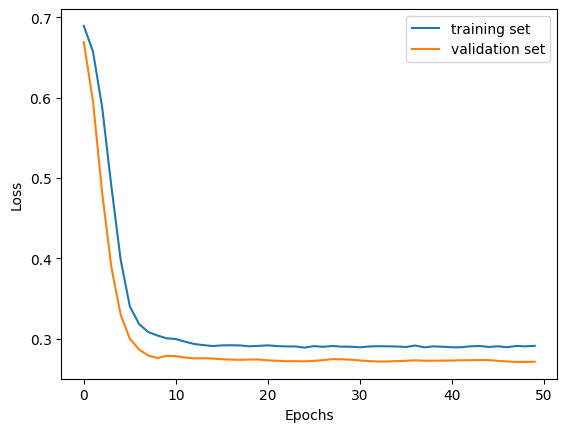

In [63]:
import matplotlib.pyplot as plt

x_epochs = [i for i in range(history.params['epochs'])]
plt.plot(x_epochs, history.history['loss'], x_epochs, history.history['val_loss'])
plt.legend(['training set', 'validation set'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Binary Accuracy')

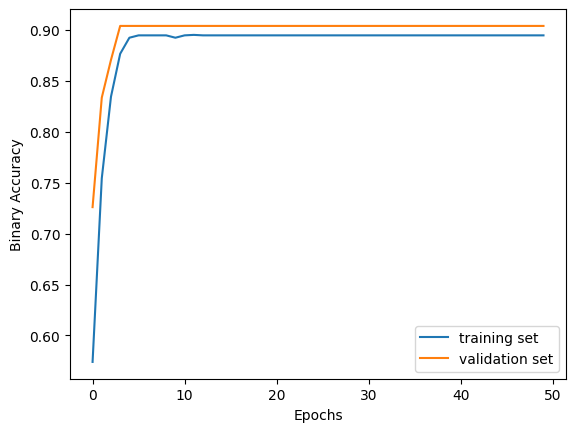

In [64]:
x_epochs = [i for i in range(history.params['epochs'])]
plt.plot(x_epochs, history.history['binary_accuracy'], x_epochs, history.history['val_binary_accuracy'])
plt.legend(['training set', 'validation set'])
plt.xlabel('Epochs')
plt.ylabel('Binary Accuracy')

Text(0, 0.5, 'Accuracy')

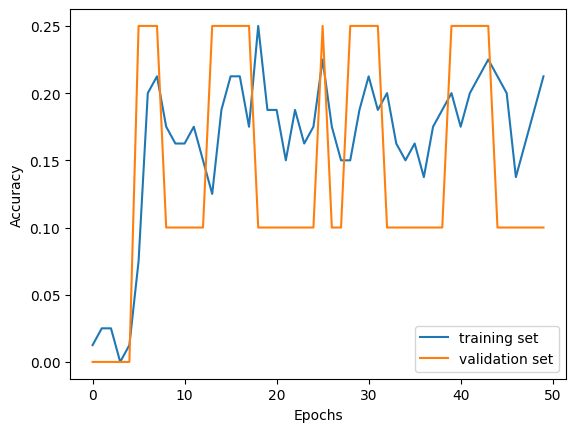

In [65]:
x_epochs = [i for i in range(history.params['epochs'])]
plt.plot(x_epochs, history.history['accuracy'], x_epochs, history.history['val_accuracy'])
plt.legend(['training set', 'validation set'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [68]:
y_test_pred = model.predict(x_test)
y_test_pred[0], y_test[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


(array([0.16286276, 0.1563914 , 0.34160408, 0.07639873, 0.06351298,
        0.1979344 , 0.07125463, 0.37397143, 0.2769355 , 0.18409343,
        0.11806864, 0.04403275, 0.08764621, 0.02508419, 0.03710186,
        0.06784812, 0.05681353, 0.03445474, 0.06939046, 0.03609812,
        0.11951574, 0.02541974, 0.00998806, 0.01300328, 0.03786155,
        0.01139827, 0.01204162], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))